### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Importing Dataset

In [2]:
df=pd.read_csv("cleaned_new.csv")
df=pd.DataFrame(df)

### Checking Information about the Dataset

In [3]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149.0,1.0,9.0,19-10-2018,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225.0,1.0,45.0,21-05-2019,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150.0,3.0,0.0,Not_reviewed,0.00,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89.0,1.0,58.5,05-07-2019,3.89,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80.0,10.0,9.0,19-11-2018,0.10,1,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48895 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48895 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  float64
 10  minimum_nights                  48895 non-null  float64
 11  number_of_reviews               48895 non-null  float64
 12  last_review                     

### Changing the Data Types

In [5]:
def change(df, arr):
    for i in arr:
        if i in df.columns:
            df[i] = df[i].astype(str)
    return df

In [6]:
arr = ['id', 'host_id', 'longitude', 'latitude', 'calculated_host_listings_count', 'availability_365']
df = change(df, arr)

In [8]:
df.describe()

,price,minimum_nights,number_of_reviews,reviews_per_month
count,48895.000000,48895.00000,48895.00000,48895.000000
mean,128.946293,3.82532,15.67419,0.986579
std,71.558358,3.32072,20.34953,1.238206
min,49.000000,1.00000,0.00000,0.000000
25%,69.000000,1.00000,1.00000,0.040000
50%,106.000000,3.00000,5.00000,0.370000
75%,175.000000,5.00000,24.00000,1.580000
max,269.000000,11.00000,58.50000,3.890000


### Analysis of neighbourhood Groups

In [9]:
neighbourhood_index = df['neighbourhood_group'].value_counts().index
neighbourhood_values = df['neighbourhood_group'].value_counts().values

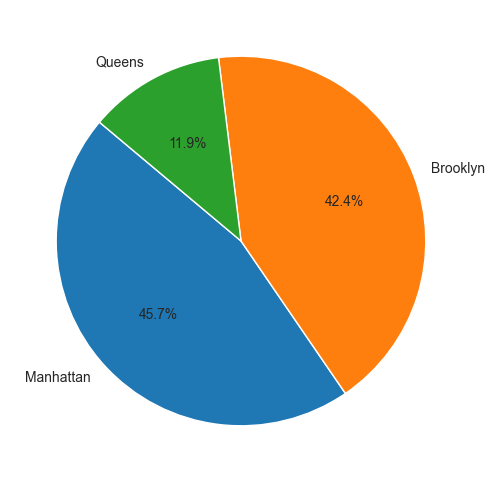

In [13]:
plt.figure(figsize=(6,6))## plotting the pie chart of top 3 neighbourhood groups
plt.pie(neighbourhood_values[:3], labels=neighbourhood_index[:3], autopct='%1.1f%%', startangle=140)
plt.show()


### OBSERVATION--> Manhattan is the most popular neighbourhood group of listings, followed by Brooklyn  and Queens

In [20]:
result = df.value_counts(['neighbourhood_group', 'price']).reset_index(name='counts')
result

,neighbourhood_group,price,counts
0,Manhattan,269.0,3525
1,Brooklyn,49.0,2749
2,Queens,49.0,1157
3,Brooklyn,269.0,1153
4,Manhattan,150.0,1052
...,...,...,...
751,Queens,240.0,1
752,Queens,246.0,1
753,Bronx,92.0,1
754,Bronx,93.0,1


##### Visualizing the count of listings by neighbourhood group and price

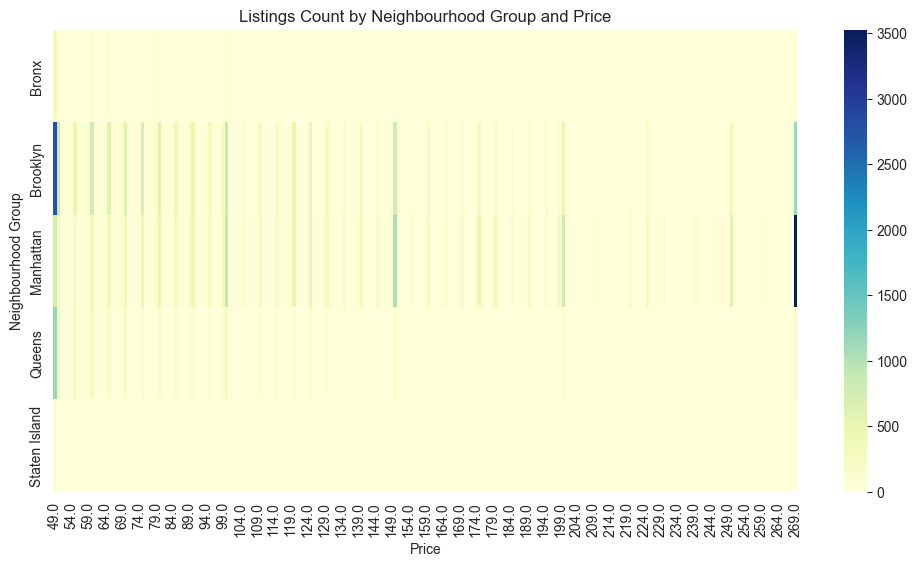

In [29]:
pivot= result.pivot_table(index='neighbourhood_group', columns='price', values='counts', fill_value=0)
plt.figure(figsize=(12,6))
sns.heatmap(pivot, cmap='YlGnBu')
plt.title('Listings Count by Neighbourhood Group and Price')
plt.xlabel('Price')
plt.ylabel('Neighbourhood Group')
plt.show()

### OBSERVATION--> The heatmap shows the count of listings by neighbourhood group and price.
#### The darker the color, the higher the count of listings.
#### Manhattan has the highest count of listings across all price ranges, followed by Brooklyn and Queens.
#### Brooklyn has a significant number of listings in the lower price range, while Staten Island has the least number of listings across all price ranges.
#### staten Island has the least number of listings across all price ranges.

#### Analysis of Room Types

In [26]:
df.groupby(['room_type','price']).size().reset_index(name='counts')

,room_type,price,counts
0,Entire home/apt,49.0,117
1,Entire home/apt,50.0,73
2,Entire home/apt,51.0,4
3,Entire home/apt,52.0,6
4,Entire home/apt,53.0,5
...,...,...,...
475,Shared room,235.0,1
476,Shared room,249.0,1
477,Shared room,250.0,4
478,Shared room,260.0,1


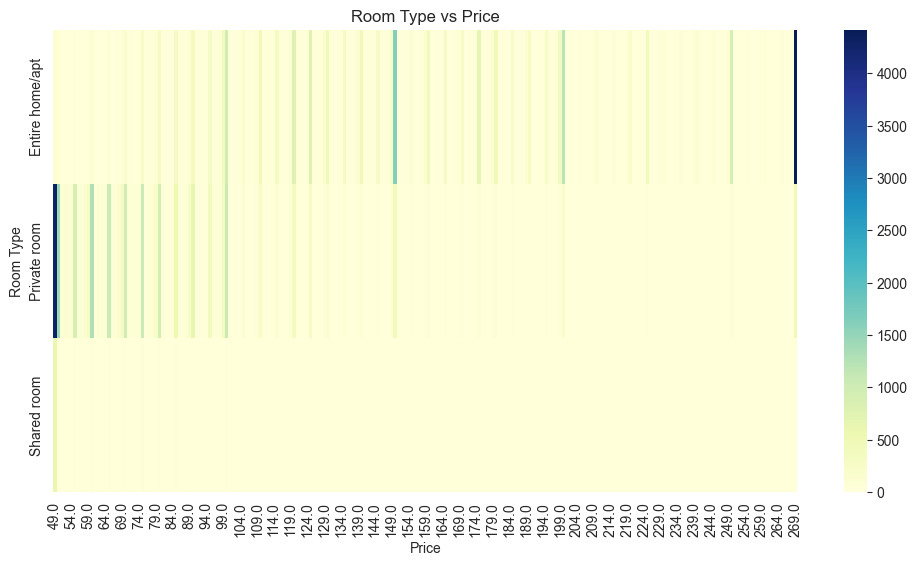

In [31]:
pivot= df.pivot_table(index='room_type', columns='price', values='id', aggfunc='count', fill_value=0)
plt.figure(figsize=(12,6))
sns.heatmap(pivot, cmap='YlGnBu')
plt.title('Room Type vs Price')
plt.xlabel('Price')
plt.ylabel('Room Type')
plt.show()


### OBSERVATION--> The heatmap shows the count of listings by room type and price.
#### The darker the color, the higher the count of listings.
#### Entire home/apt has the highest count of listings across all price ranges, followed by Private room and Shared room.
#### Private room has a significant number of listings in the lower price range, while Shared room has the least number of listings across all price ranges.
#### Shared room has the least number of listings across all price ranges.

### Analysis of Number of Reviews

In [37]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149.0,1.0,9.0,19-10-2018,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225.0,1.0,45.0,21-05-2019,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.9419,Private room,150.0,3.0,0.0,Not_reviewed,0.00,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89.0,1.0,58.5,05-07-2019,3.89,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80.0,10.0,9.0,19-11-2018,0.10,1,0


In [38]:
reviews=df.groupby(['price','neighbourhood','number_of_reviews']).size().reset_index().rename(columns={0:"Rating Count"})

In [39]:
reviews

,price,neighbourhood,number_of_reviews,Rating Count
0,49.0,Allerton,0.0,3
1,49.0,Allerton,1.0,2
2,49.0,Allerton,2.0,2
3,49.0,Allerton,21.0,1
4,49.0,Allerton,38.0,1
...,...,...,...,...
27708,269.0,Woodside,7.0,1
27709,269.0,Woodside,10.0,2
27710,269.0,Woodside,11.0,1
27711,269.0,Woodside,31.0,1


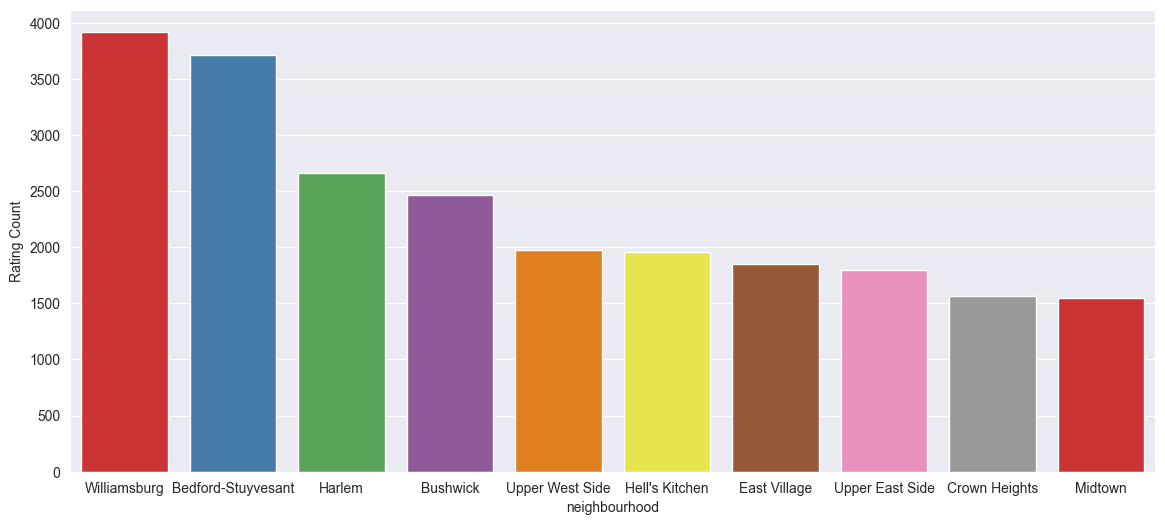

In [49]:
import matplotlib
plt.figure(figsize=(14,6))
top10 = reviews.groupby('neighbourhood')['Rating Count'].sum().nlargest(10).reset_index()
sns.barplot(x="neighbourhood",y="Rating Count",data=top10,palette='Set1',hue='neighbourhood')
plt.show()

### OBSERVATION--> The bar chart shows the top 10 neighbourhoods with the highest number of reviews.
#### Williamsburg has the highest number of reviews, followed by Bedford-Stuyvesant and Harlem.
#### The other neighbourhoods have a significantly lower number of reviews.

### Analysis which of the neighbourhood has the highest number of availability

In [64]:
available=df.groupby(['neighbourhood','availability_365']).size().reset_index(name='counts')
available

,neighbourhood,availability_365,counts
0,Allerton,0,5
1,Allerton,1,1
2,Allerton,155,1
3,Allerton,157,1
4,Allerton,169,1
...,...,...,...
14176,Woodside,91,1
14177,Woodside,93,1
14178,Woodside,94,1
14179,Woodside,95,1


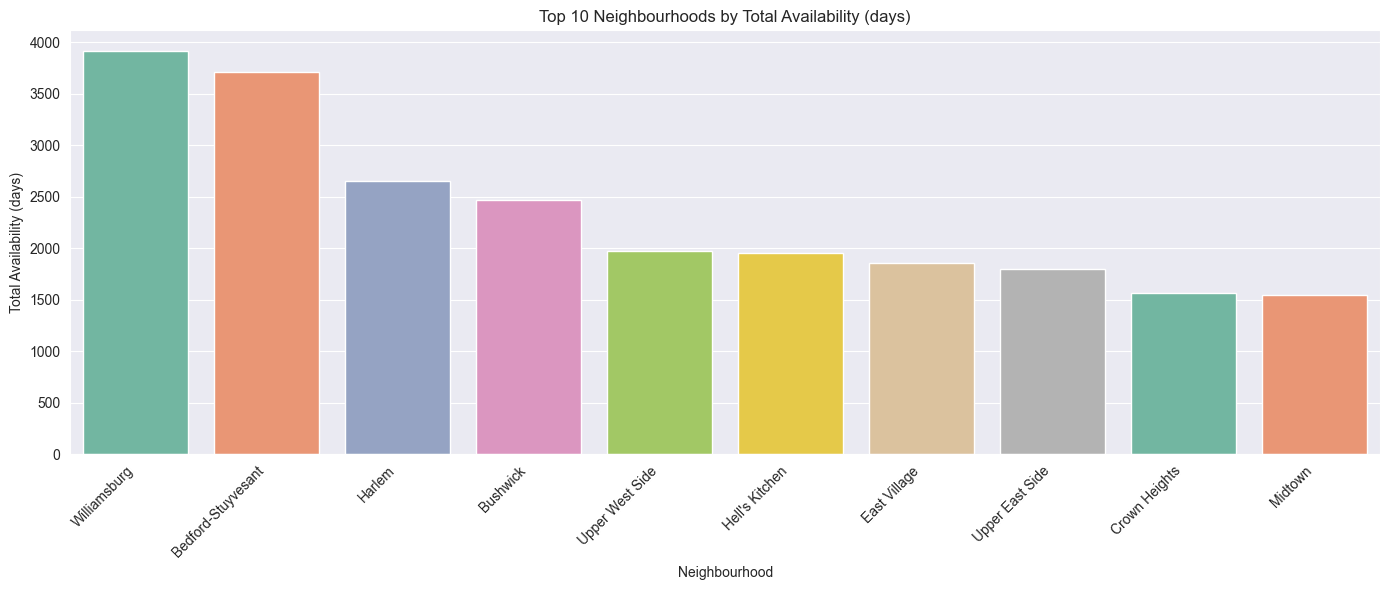

In [62]:
top10_avail = available.groupby('neighbourhood')['counts'].sum().nlargest(10).reset_index()

plt.figure(figsize=(14,6))
sns.barplot(x='neighbourhood', y='counts', data=top10_avail, palette='Set2',hue='neighbourhood')
plt.title('Top 10 Neighbourhoods by Total Availability (days)')
plt.xlabel('Neighbourhood')
plt.ylabel('Total Availability (days)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

#### OBSERVATION--> The bar chart shows the top 10 neighbourhoods with the highest number of availability.
#### Williamsburg has the highest number of availability, followed by Bedford-Stuyvesant and Harlem.


### Conclusion
#### 1. The most popular neighbourhood group is Manhattan, followed by Brooklyn and Queens.
#### 2. The heatmap shows the count of listings by neighbourhood group and price, with Manhattan having the highest count across all price ranges.
#### 3. The room type analysis shows that Entire home/apt has the highest count of listings across all price ranges, followed by Private room and Shared room.